In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Template Matching

### Template matching basically takes an image and compares this image to parts of another image to find matches. In the code below I will use a picture of waldo as a template to find him in a crowded scene using template matching. 

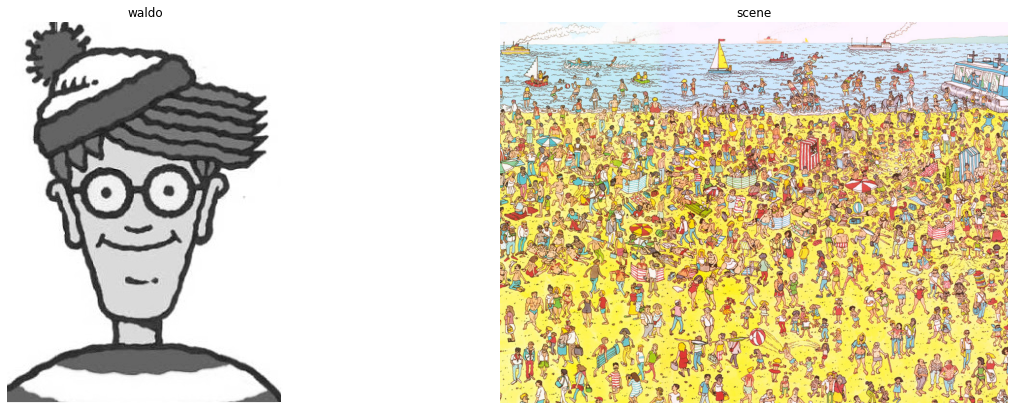

In [59]:
# Load img/WandoScene.jpg  as the main image
scene = cv2.imread("./img/WaldoScene.jpg")
scene_gray = cv2.cvtColor(scene, cv2.COLOR_BGR2GRAY)
scene_color = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
# Load img/waldo.jpg as the template
waldo = cv2.imread("./img/waldo.jpg")
waldo = cv2.cvtColor(waldo, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(20, 7)) 
rows = 1
columns = 2
  
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
plt.imshow(waldo, cmap="gray") 
plt.axis('off') 
plt.title("waldo") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
plt.imshow(scene_color) 
plt.axis('off') 
plt.title("scene");

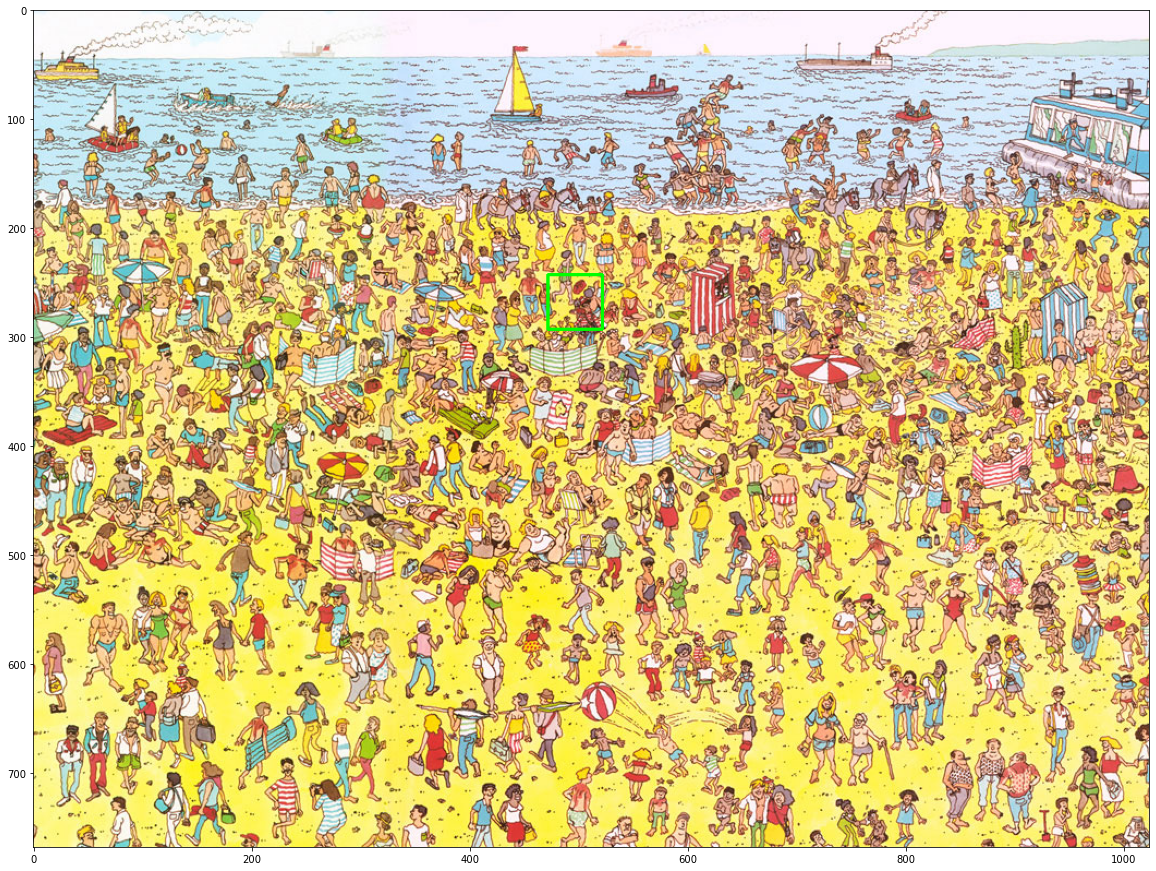

In [2]:
# Find the template (waldo) in the image (scene)
match = cv2.matchTemplate(scene_gray, waldo, cv2.TM_CCOEFF)
scene_color_copy = scene_color.copy()
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)

# Draw a rectagle around the the detected match
# max_loc gives top left point
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)

cv2.rectangle(scene_color_copy, top_left, bottom_right, (0,255,0), 2)

plt.figure(figsize=(20,20))
plt.imshow(scene_color_copy);